<a href="https://colab.research.google.com/github/Darianath/CHMP/blob/main/%D0%9B%D0%A0%E2%84%9613_%D0%9D%D0%B0%D0%B7%D0%B0%D1%80%D0%BE%D0%B2%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Лабораторна робота 13

Назарова Дар'я


Варіант 18
ФІТ 2-8



#Метод Ейлера

x = [0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8] 
y = [1.3    1.4595 1.6353 1.8269 2.033  2.2521 2.4821 2.7204 2.9643 3.2108
 3.4573]


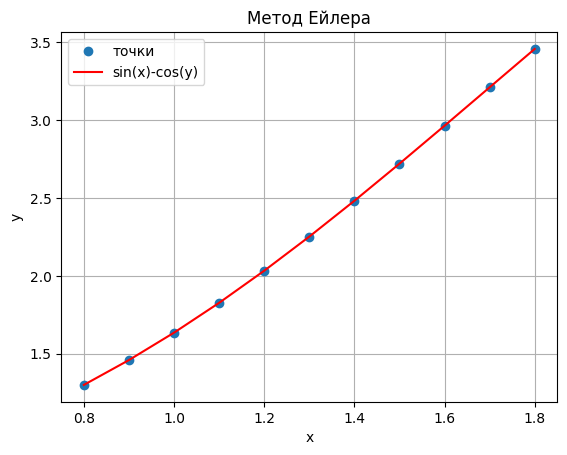

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return x + np.sin(y / np.sqrt(2))

# Вводимо параметри (ліва, права межі відрізку, крок, початкова умова)
a, b, h, y0 = 0.8, 1.8, 0.1, 1.3

# Перевірка вхідних параметрів
if h <= 0:
    print("Крок h повинен бути позитивним.")
    exit()
if a >= b:
    print("Права межа b повинна бути більшою за ліву межу a.")
    exit()

n = int((b - a) / h) # кількість кроків

x = np.array([a + i*h for i in range(n + 1)]) # задаємо x генератором списків

y = np.empty(n + 1)
y[0] = y0

for i in range(n):
    y[i + 1] = y[i] + f(x[i], y[i]) * h

y_rounded = np.round_(y, 4)
print("x =", x, "\ny =", y_rounded)

plt.plot(x, y, "o", x, y, "red")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Метод Ейлера")
plt.legend(["точки", "sin(x)-cos(y)"])
plt.grid()
plt.show()

#Розв’язок диф. Рівняння за допомогою scipy.integrate import odeint

x = [0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8]
y = [1.3        1.46786758 1.65202087 1.85144936 2.06461278 2.28945634
 2.52349457 2.76396303 3.00801917 3.25296018 3.49641738]


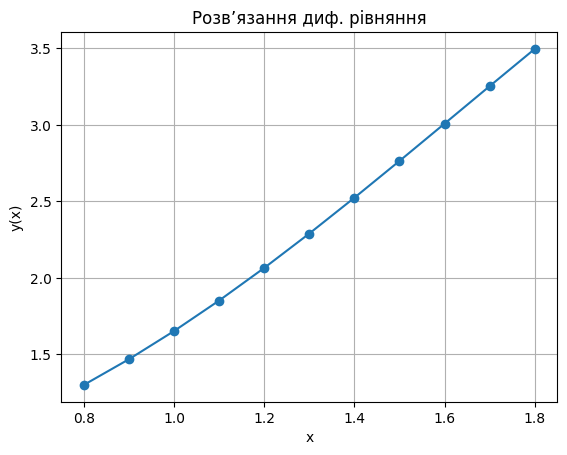

In [8]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Функція, що повертає dy/dx
def model(y, x):
    return x + np.sin(y / np.sqrt(2))

y0 = 1.3

x = np.linspace(0.8, 1.8, 11)

y = odeint(model, y0, x)

# Виведення результатів
print('x =', x)
print('y =', y.flatten())

# Побудова графіка результатів
plt.plot(x, y, marker='o')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Розв’язання диф. рівняння')
plt.grid()
plt.show()


#Метод Ейлера-Коші

x = [1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2] 
y = [2.1    2.2558 2.4129 2.5711 2.7301 2.89   3.0507 3.2122 3.3748 3.5386
 3.704 ]


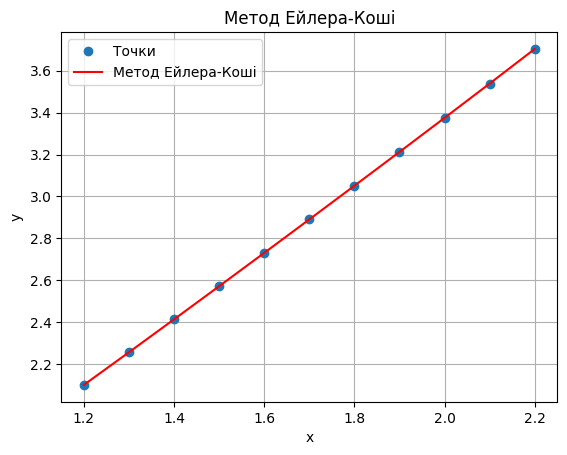

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return x + np.cos(y / np.sqrt(3))

a = 1.2  # ліва межа відрізку
b = 2.2  # права межа відрізку
h = 0.1  # крок
y0 = 2.1  # початкова умова
n = int((b - a) / h)  # кількість кроків

# Генерація x з точно n + 1 точками від a до b
x = np.linspace(a, b, n + 1)

y = np.empty(n + 1)
y[0] = y0

# Метод Ейлера-Коші
for i in range(n):
    k1 = f(x[i], y[i])
    k2 = f(x[i] + h, y[i] + h * k1)
    y[i + 1] = y[i] + (k1 + k2) * h / 2

y_rounded = np.round_(y, 4)

print("x =", x, "\ny =", y_rounded)

# Візуалізація
plt.plot(x, y, "o", label="Точки")
plt.plot(x, y, "r-", label="Метод Ейлера-Коші")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Метод Ейлера-Коші")
plt.legend()
plt.grid()
plt.show()



#Використання scipy.integrate.solve_ivp
Функція solve_ivp є більш сучасним і гнучким способом розв'язання ODE, ніж odeint. Вона також дозволяє використовувати різні методи інтегрування.

x = [1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2]
y = [2.1        2.25582363 2.41294035 2.57110591 2.73015825 2.89001333
 3.05066514 3.2121857  3.37472503 3.53851121 3.70385031]


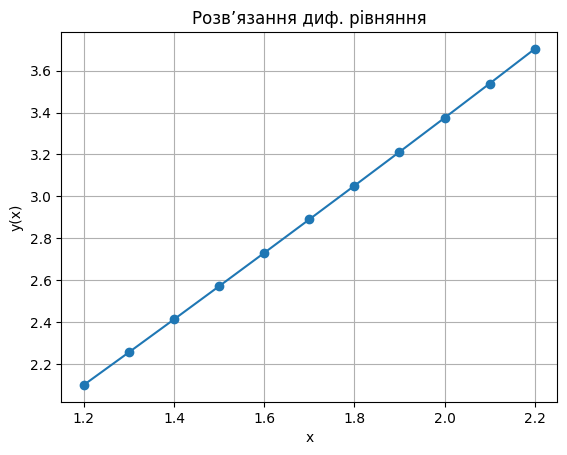

In [10]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Функція, що повертає dy/dx
def model(x, y):
    return x + np.cos(y / np.sqrt(3))

# Початкова умова
y0 = [2.1]  # Потрібно передати як список

# Значення x (в межах від 1.2 до 2.2)
x = np.linspace(1.2, 2.2, 11)

# Розв'язання ODE
sol = solve_ivp(model, [1.2, 2.2], y0, t_eval=x)

# Виведення результатів
print('x =', sol.t)
print('y =', sol.y[0])

# Побудова графіка результатів
plt.plot(sol.t, sol.y[0], marker='o')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Розв’язання диф. рівняння')
plt.grid()
plt.show()
